# Условие

$$
u'' - 2u' - u=-2xe^{x}
$$
$$
u(0)=0 
$$
$$
u(1)=e 
$$
$$
u(x) = xe^x
$$

# Решение

$$
\phi_0(x) = x \cdot e ^ x
$$
$$
\phi'_0(x) = (1 + x) e^x
$$
$$
\phi''_0(x) = (2 + x) e^x
$$
$$
\phi_k(x) = x \cdot (1 - x^k)
$$
$$
\phi'_k(x) = 1 - (1 + k) \cdot x^k
$$
$$
\phi''_k(x) = - k \cdot (1 + k) \cdot x^{k - 1}
$$

$$
L\phi_k = -k(1+k)x^{k-1} - 2 + 2(1+k)x^k - x(1-x^k)
$$

$$
A_{ij} = \int\limits_0^1 x \cdot (1-x^i) \cdot (-k(1+k)x^{k-1} - 2 + 2(1+k)x^k - x(1-x^k)) ~ dx = 
$$

$$
=-j+\frac{2\left(j+1\right)}{j+2}-\frac{4}{3}+\frac{1}{j+3}+\frac{j\left(j+1\right)}{j+i+1}+\frac{2}{i+2}-\frac{2\left(j+1\right)}{i+j+2}+\frac{1}{i+3}-\frac{1}{i+j+3}
$$

$$
L\phi_0 = -2xe^x
$$

$$
d_i = 0
$$

# Funcs

## Imports

In [12]:
from numpy import zeros, exp, linspace, linalg
import matplotlib.pyplot as plt

## Variables

In [13]:
N = 2

In [14]:
arr = zeros((N, N))
b = zeros(N)

In [15]:
def A(i, j):
    return (
        -j
        + 2 * (j + 1) / (j + 2)
        - 4 / 3
        + 1 / (j + 3)
        + j * (j + 1) / (i + j + 1)
        + 2 / (i + 2)
        - 2 * (j + 1) / (i + j + 2)
        + 1 / (i + 3)
        - 1 / (i + j + 3)
    )

In [16]:
def d(i):
    return 0

In [17]:
for i in range(N):
    for j in range(N):
        arr[i, j] = A(i + 1, j + 1)

    b[i] = d(i + 1)

In [18]:
C = linalg.solve(arr, b)
C

array([-0.,  0.])

## Functions

In [19]:
def u0(x):
    return x * exp(x)

In [20]:
def phi(k, x):
    return x * (1 - x**k)

In [21]:
def u_approx(x):
    res = u0(x)

    for k in range(N):
        res += C[k] * phi(k + 1, x)

    return res


def precise(x):
    return x * exp(x)

# Graphs

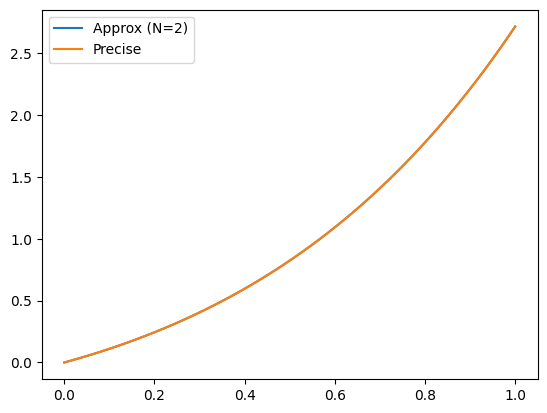

In [ ]:
x_r = linspace(0, 1, 100)

plt.plot(x_r, u_approx(x_r), label=f"Approx (N={N})")
plt.plot(x_r, precise(x_r), label="Precise")

plt.legend()

plt.show()